<a href="https://colab.research.google.com/github/SaiSathwik21211a05r6/StaticFacialRecognition/blob/main/FacialRecognitionSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Image Handling

In [ ]:
import os

In [ ]:
os.system('python -m pip install pillow')
os.system('python -m pip install dlib')
os.system('python -m pip install face_recognition')
os.system('python -m pip install Flask')

0

In [ ]:
from PIL import Image, ImageDraw
import face_recognition
from flask import Flask, request, jsonify, render_template

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
img=Image.open('/content/obama1.jpg')
print(img.size)
plt.imshow(img)

FileNotFoundError: ignored

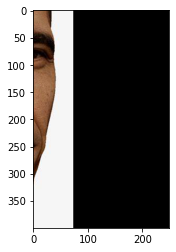

In [ ]:
cimg=img.crop((400,200,650,600))
plt.imshow(cimg)

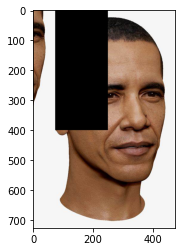

In [ ]:
img.paste(cimg,(0,0))
plt.imshow(img)

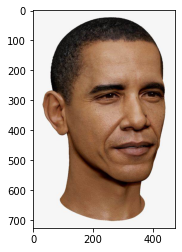

In [ ]:
dimg1=face_recognition.load_image_file("/content/obama1.jpg")
dimg2=face_recognition.load_image_file("/content/obama2.jpg")
plt.imshow(dimg1)

##Performing Encoding

In [ ]:
dimg1_en=face_recognition.face_encodings(dimg1)[0]
dimg2_en=face_recognition.face_encodings(dimg2)[0]

In [ ]:
known_faces=[dimg1_en,dimg2_en]

In [ ]:
results=face_recognition.compare_faces(known_faces, dimg2_en)
print(results[0])
print(results[1])

True
True


In [ ]:
x=os.listdir('/content/Obama pics')
len(x)

5

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
y=os.listdir('/content/Dhoni Pics')
len(y)

4

##Loading Folders

In [ ]:
dimg_load=[]
for i in range(len(x)):
  img=face_recognition.load_image_file("/content/Dhoni Pics/Dhoni1.jpg")
  dimg_load.append(img)
  print(len(dimg_load))

1
2
3
4
5


In [ ]:
rimg_load=[]
for i in range(len(y)):
  img=face_recognition.load_image_file("/content/Dhoni Pics/Obamanew1.jpg")
  rimg_load.append(img)
  print(len(rimg_load))

1
2
3
4


##Encoding Folders

In [ ]:
dimg_en=[]
for i in range(len(dimg_load)):
 img=face_recognition.face_encodings(dimg_load[i])[0]
dimg_en.append(img)
print(len(dimg_load))

5


In [ ]:
rimg_en=[]
for i in range(len(rimg_load)):
 img=face_recognition.face_encodings(rimg_load[i])[0]
rimg_en.append(img)
print(len(rimg_load))

4


In [ ]:
rimg1=face_recognition.load_image_file("/content/Obama pics/obama1.jpg")

In [ ]:
rimg1_en=face_recognition.face_encodings(rimg1)[0]

##Comparing Images

In [ ]:
results=face_recognition.compare_faces(dimg_en,rimg1_en)
for i in range(len(results)):
  if results[0]==True:
    print('matching')
  else:
    print('no matching')

no matching


Deployment

In [ ]:
app = Flask(__name__, static_folder='static')


@app.route('/', methods=['GET', 'POST'])
def detect_face():
    if request.method == 'POST':
        # Get the known and unknown images from the request
        previous_image = face_recognition.load_image_file(request.files['known_image'])
        new_image = face_recognition.load_image_file(request.files['unknown_image'])
        
        # Encode the known face and detect faces in the unknown image
        known_encoding = face_recognition.face_encodings(previous_image)[0]
        face_locations = face_recognition.face_locations(new_image)
        face_encodings = face_recognition.face_encodings(new_image, face_locations)

        # Create a Pillow Image object from the unknown image
        pil_image = Image.fromarray(new_image)

        # Create a Pillow ImageDraw object to draw on the image
        draw = ImageDraw.Draw(pil_image)

        # Loop through each face found in the unknown image
        for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
            # Compare the face encoding with the known encoding
            matches = face_recognition.compare_faces([known_encoding], face_encoding)

            # If the faces match, draw a box around the face and label it
            if matches[0]:
                draw.rectangle(((left, top), (right, bottom)), outline=(0, 255, 0), width=5)
                draw.text((left, top - 30), "Known Face", fill=(0, 255, 0, 255))
            # If the faces don't match, draw a box around the face and label it
            else:
                draw.rectangle(((left, top), (right, bottom)), outline=(255, 0, 0), width=5)
                draw.text((left, top - 30), "Unknown Face", fill=(255, 0, 0, 255))

        # Save the image and return the result
        pil_image.save('result.jpg')
        return render_template('output.html')
    else:
        return render_template('input1.html')
if __name__ == '__main__':
    app.run(host='0.0.0.0', port=1000)

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:1000
 * Running on http://172.28.0.12:1000
INFO:werkzeug:Press CTRL+C to quit
